
#### 12/30/20

#### based on the introduction to Int. to ML with Python - A.C.Müller,S.Guido
---

In [1]:
from preamble import *
%matplotlib inline


In [2]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

Python 버전: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 1.1.5
matplotlib 버전: 3.3.2
NumPy 버전: 1.16.6
SciPy 버전: 1.5.0
IPython 버전: 7.18.1
scikit-learn 버전: 0.22


### Various Regression Algorithms -- see Int. to ML at very lower blocks

## Get the data

#####  pandas data reading 12/11/20 by blee
##### copied from 04-representing-data-.....

In [3]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "pile.csv"), header=None, index_col=False,
    names=['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure','qpredict',
         'source', 'testnum', 'site'  ], encoding='cp949')

# 예제를 위해 몇개의 열만 선택합니다
data = data[['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure','qpredict']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,phishaft,phitop,sigvtip,length,area,qmeasure,qpredict
0,33.0,38.0,255,24.5,0.13,2615,2494
1,34.0,37.5,206,19.8,0.22,3674,3638
2,33.0,38.0,223,21.5,0.13,2164,2389
3,33.0,37.5,210,20.2,0.15,3042,2881
4,33.0,37.0,206,19.9,0.18,2856,2831


### *Take a Quick Look at the Data Structure*

In [4]:
print(data.keys())
print(data.shape)



Index(['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure',
       'qpredict'],
      dtype='object')
(59, 7)


In [5]:
# p 48

#data.loc[:,['pileshaft','area']]
#data[:,['phishaft']]
data.head()
data.tail()
data.index
data.columns
#data.describe()
#data[0:3]
#data.loc[:,['phishaft','area']]
#data.iloc[:,0:5]
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   phishaft  59 non-null     float64
 1   phitop    59 non-null     float64
 2   sigvtip   59 non-null     int64  
 3   length    59 non-null     float64
 4   area      59 non-null     float64
 5   qmeasure  59 non-null     int64  
 6   qpredict  59 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 3.4 KB


,phishaft,phitop,sigvtip,length,area,qmeasure,qpredict
count,59.00,59.00,59.00,59.00,5.90e+01,59.00,59.00
mean,34.87,36.41,179.80,17.49,1.34e-01,2207.63,2237.39
std,2.13,2.11,82.39,7.96,1.03e-01,1231.89,1229.55
min,28.00,31.00,38.00,3.00,6.10e-03,75.00,480.00
25%,33.50,35.00,125.50,12.20,7.64e-02,1281.00,1382.50
50%,35.00,36.00,169.00,16.50,9.99e-02,1948.00,1830.00
75%,35.75,37.50,214.00,21.15,1.64e-01,3055.50,2975.00
max,39.00,41.00,475.00,47.20,6.57e-01,5604.00,5604.00


<AxesSubplot:>

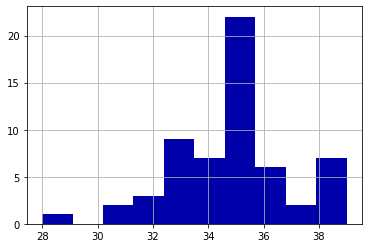

In [6]:
data["phishaft"].hist()

array([[<AxesSubplot:title={'center':'phishaft'}>,
        <AxesSubplot:title={'center':'phitop'}>,
        <AxesSubplot:title={'center':'sigvtip'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'qmeasure'}>],
       [<AxesSubplot:title={'center':'qpredict'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

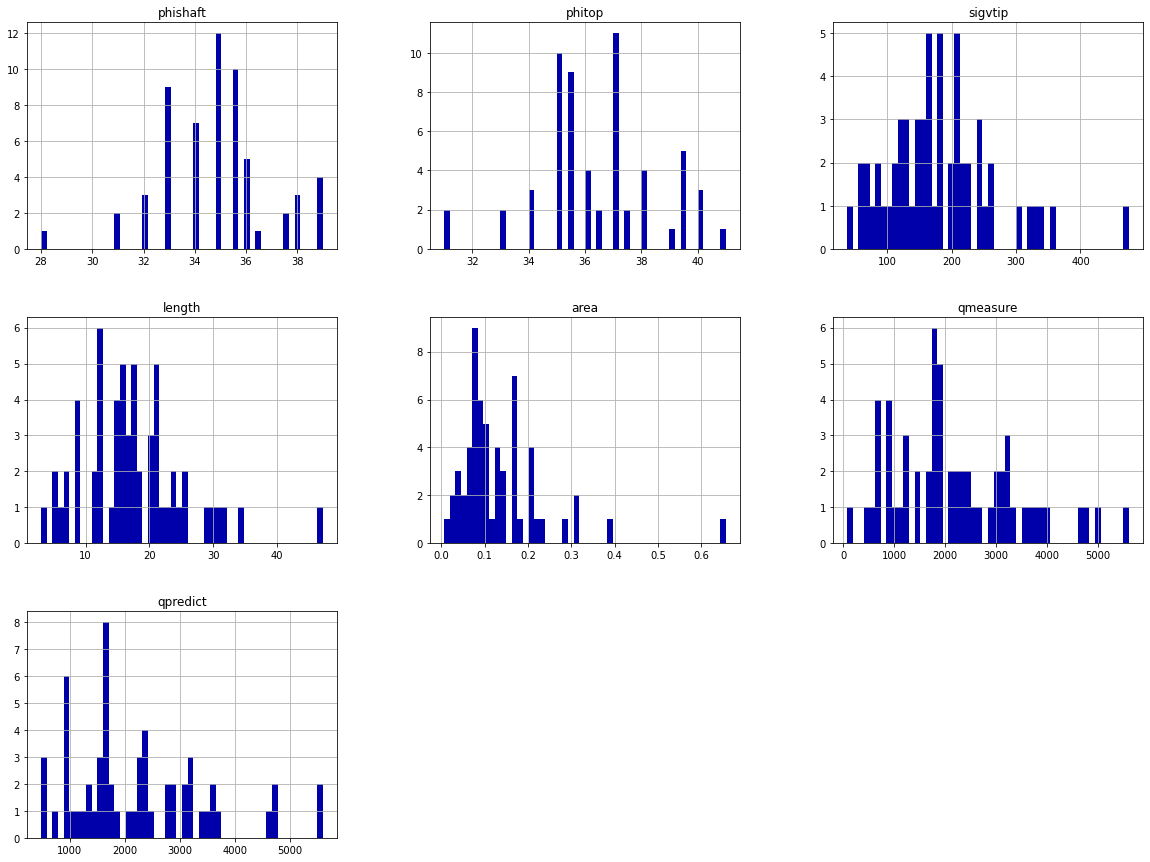

In [7]:
# p49 Hands on

data.hist(bins=50, figsize=(20,15))



### *create a test set*


In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Discover and Visualize the Data to Gain Insights

### *Visualizing data*

P56

<AxesSubplot:xlabel='phitop', ylabel='qmeasure'>

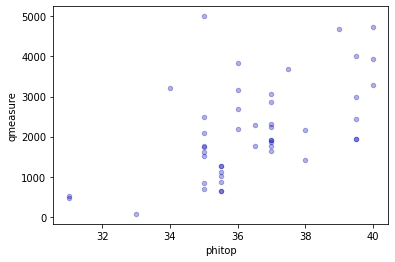

In [9]:
data1 = train_set.copy()
data1.plot(kind="scatter", x="phitop", y="qmeasure",alpha=0.3)

<AxesSubplot:xlabel='phitop', ylabel='qmeasure'>

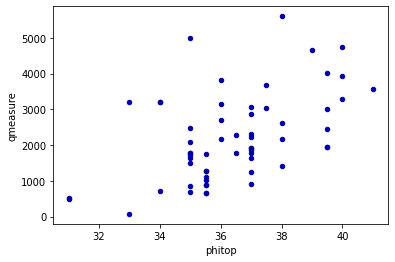

In [10]:
data.plot(kind="scatter", x="phitop", y="qmeasure")


<AxesSubplot:xlabel='phishaft', ylabel='phitop'>

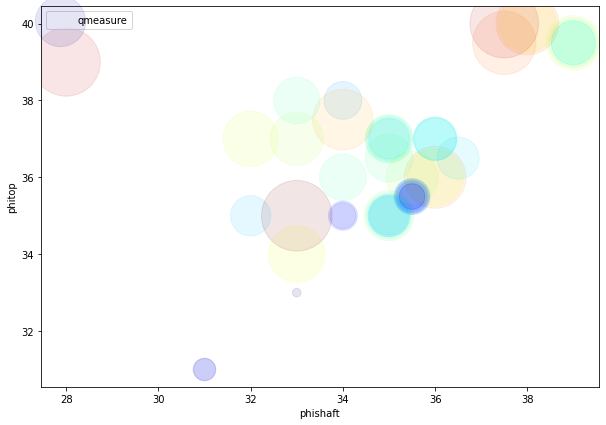

In [11]:
data1.plot(kind="scatter", x="phishaft", y="phitop", alpha=0.1,
          s=data1["qmeasure"], label="qmeasure",figsize=(10,7),
#          c="qmeasure", cmap=plt.get_cmap("jet"), colorbar=True)
          c="qmeasure", cmap=plt.get_cmap("jet"), colorbar=False)
#plt.legend()
#plt.show()
#see the high-density areas by alpha

### *Looking for corrlations*

In [12]:
# p58

corr_matrix = data1.corr()
corr_matrix["qmeasure"].sort_values(ascending=False)

qmeasure    1.00
qpredict    0.97
area        0.69
phitop      0.57
sigvtip     0.43
length      0.33
phishaft    0.09
Name: qmeasure, dtype: float64

array([[<AxesSubplot:xlabel='qmeasure', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='area', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='length', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='phitop', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='phishaft', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='sigvtip', ylabel='qmeasure'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='length', ylabel='area'>,
        <AxesSubplot:xlabel='phitop', ylabel='area'>,
        <AxesSubplot:xlabel='phishaft', ylabel='area'>,
        <AxesSubplot:xlabel='sigvtip', ylabel='area'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='length'>,
        <AxesSubplot:xlabel='area', ylabel='length'>,
        <AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='phitop', ylabel='length'>,
        <AxesSubplot:xlabel='phishaft', ylabel='length'>,
        <AxesSubplot:xlabel='sigvtip',

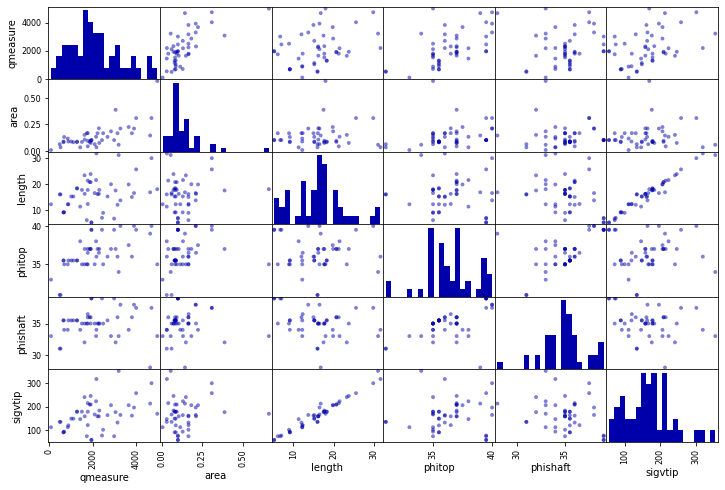

In [13]:
from pandas.plotting import scatter_matrix
#attributes = ["qmeasure", "phishaft", "area", "phitop"]
attributes = ["qmeasure", "area", "length", "phitop","phishaft","sigvtip"]
scatter_matrix(data1[attributes], figsize=(12,8),  s=60, alpha=.5,
                hist_kwds={'bins': 20})

(0.0, 0.8, 0.0, 6000.0)

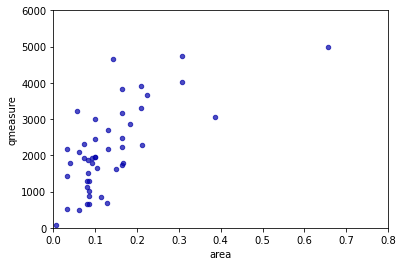

In [14]:
data1.plot(kind="scatter", x="area", y="qmeasure",
             alpha=0.7)
plt.axis([0, 0.8, 0, 6000])

### *Experimenting with Attribute Combinations*


In [15]:
data["sigv_normal"] = data["sigvtip"]/data["length"]
data["qmeasure_normal"] = data["qmeasure"]/data["area"]


data = data[["area", "length", "phitop","phishaft","sigvtip","sigv_normal","qmeasure_normal","qmeasure", "qpredict"]]

corr_matrix = data.corr()
corr_matrix["qmeasure_normal"].sort_values(ascending=False)

qmeasure_normal    1.00
sigvtip            0.52
length             0.45
sigv_normal        0.30
qmeasure           0.20
qpredict           0.13
phitop             0.03
phishaft          -0.09
area              -0.38
Name: qmeasure_normal, dtype: float64

In [16]:
data.describe()

,area,length,phitop,phishaft,...,sigv_normal,qmeasure_normal,qmeasure,qpredict
count,5.90e+01,59.00,59.00,59.00,...,59.00,59.00,59.00,59.00
mean,1.34e-01,17.49,36.41,34.87,...,10.35,20308.67,2207.63,2237.39
std,1.03e-01,7.96,2.11,2.13,...,0.92,13468.42,1231.89,1229.55
min,6.10e-03,3.00,31.00,28.00,...,8.38,4330.90,75.00,480.00
25%,7.64e-02,12.20,35.00,33.50,...,9.77,12015.60,1281.00,1382.50
50%,9.99e-02,16.50,36.00,35.00,...,10.10,16475.34,1948.00,1830.00
75%,1.64e-01,21.15,37.50,35.75,...,10.73,21654.87,3055.50,2975.00
max,6.57e-01,47.20,41.00,39.00,...,12.92,67076.92,5604.00,5604.00


## Prepare the data for ML algorithm
* *Data Cleaning*
* *Handling Text and Categorical Attributes*
* *Custom Transformers*
* *Feature Scaling*
* *Transformation Pipelines*

---

In [17]:
#*************************************************************************************
# make feature X, target y for data
# Boston data : used mglearn.datasets.load_extended_boston()
# iris data is already composed of iris_dataset['data'], iris_dataset['target']

# p216

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
# extract numpy arrays
features = data_dummies.iloc[:,0:5]
X = features.values
f_all=  data_dummies.iloc[:,0:7]
X_all = f_all.values
y = data['qmeasure'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
print("X_all.shape: {}".format(X_all.shape))

Original features:
 ['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal', 'qmeasure_normal', 'qmeasure', 'qpredict'] 

Features after get_dummies:
 ['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal', 'qmeasure_normal', 'qmeasure', 'qpredict']
X.shape: (59, 5) y.shape: (59,)
X_all.shape: (59, 7)


In [18]:
#*************************************************************************************

# p 53 int to ML with python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# needs stratified sampling for small data set: make strata and sample right number of instances from each stratum ....

## Select and Train a Model
* *training and evaluatin on the training set*
* *better evaluation using cross-validations*

---

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,0:5], y_train)
#lr = LinearRegression().fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data.iloc[:3, :5].values
some_labels = data.iloc[:3, 8].values
#some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [2833.543 3133.823 2626.504]
Labels: [2494, 3638, 2389]


In [21]:
from sklearn.metrics import mean_squared_error
some_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, some_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


376.78089538079524

#### try for other number of samples

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,0:2], y_train)
#lr = LinearRegression().fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data.iloc[:3, 0:2].values
some_labels = data.iloc[:3, 8].values
#some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [2546.214 2956.637 2390.308]
Labels: [2494, 3638, 2389]


In [24]:
from sklearn.metrics import mean_squared_error
some_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, some_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

394.53901921642336

In [25]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(some_labels, some_predictions)
lin_mae

244.9616489491018

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [27]:
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.21320071635561044

In [28]:
print(data.keys())
print(data.shape)

Index(['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal',
       'qmeasure_normal', 'qmeasure', 'qpredict'],
      dtype='object')
(59, 9)


---
### 말뚝 지지력 머신러닝 적용

* 데이터 구조
    * feature(특성) : 측면마찰각, 선단마찰각, 선단유효응력, 길이, 단면적
    * label : 측정값, 계산값

#### *better evaluation using cross-validations*
Scikit-Learn’s K-fold cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [30]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 766.473  957.545  363.542 1176.129 1103.494  536.376  945.503  738.102
  989.171 1238.591]
Mean: 881.492638198213
Standard deviation: 265.75526110004716


In [31]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 832.714  432.459  466.841  706.315  645.477  482.331  366.793  311.881
  535.425 1348.584]
Mean: 612.8821624108209
Standard deviation: 287.6562919509073


In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [33]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

304.0787506725034

In [34]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 679.481  978.905  488.274  818.089 1325.788  437.014  619.887  517.538
  521.891 1235.631]
Mean: 762.2498300570189
Standard deviation: 302.8757174903026


In [35]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count      10.00
mean      612.88
std       303.22
min       311.88
25%       441.05
50%       508.88
75%       691.11
max      1348.58
dtype: float64

count      59.00
mean     2207.63
std      1231.89
min        75.00
25%      1281.00
50%      1948.00
75%      3055.50
max      5604.00
Name: qmeasure, dtype: float64

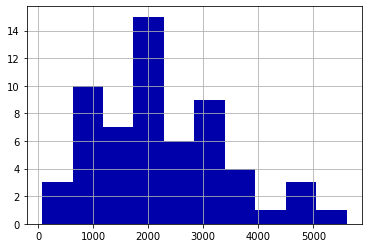

In [36]:
data["qmeasure"].hist()
data["qmeasure"].describe()

## Fine-tune the model
* *grid search*
* *randomized search*
* *ensemble methods*
* *analyze the best models and their errors*
* *evaluate the system on the test set
---

## Lanunch, monitor, and maintain the system

*from here "the lower blocks"*
# ============
### int. to ML with python by Muller and Guido
---

In [37]:
data.describe()

,area,length,phitop,phishaft,...,sigv_normal,qmeasure_normal,qmeasure,qpredict
count,5.90e+01,59.00,59.00,59.00,...,59.00,59.00,59.00,59.00
mean,1.34e-01,17.49,36.41,34.87,...,10.35,20308.67,2207.63,2237.39
std,1.03e-01,7.96,2.11,2.13,...,0.92,13468.42,1231.89,1229.55
min,6.10e-03,3.00,31.00,28.00,...,8.38,4330.90,75.00,480.00
25%,7.64e-02,12.20,35.00,33.50,...,9.77,12015.60,1281.00,1382.50
50%,9.99e-02,16.50,36.00,35.00,...,10.10,16475.34,1948.00,1830.00
75%,1.64e-01,21.15,37.50,35.75,...,10.73,21654.87,3055.50,2975.00
max,6.57e-01,47.20,41.00,39.00,...,12.92,67076.92,5604.00,5604.00


array([[<AxesSubplot:xlabel='qmeasure', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='area', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='length', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='phitop', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='phishaft', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='sigvtip', ylabel='qmeasure'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='length', ylabel='area'>,
        <AxesSubplot:xlabel='phitop', ylabel='area'>,
        <AxesSubplot:xlabel='phishaft', ylabel='area'>,
        <AxesSubplot:xlabel='sigvtip', ylabel='area'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='length'>,
        <AxesSubplot:xlabel='area', ylabel='length'>,
        <AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='phitop', ylabel='length'>,
        <AxesSubplot:xlabel='phishaft', ylabel='length'>,
        <AxesSubplot:xlabel='sigvtip',

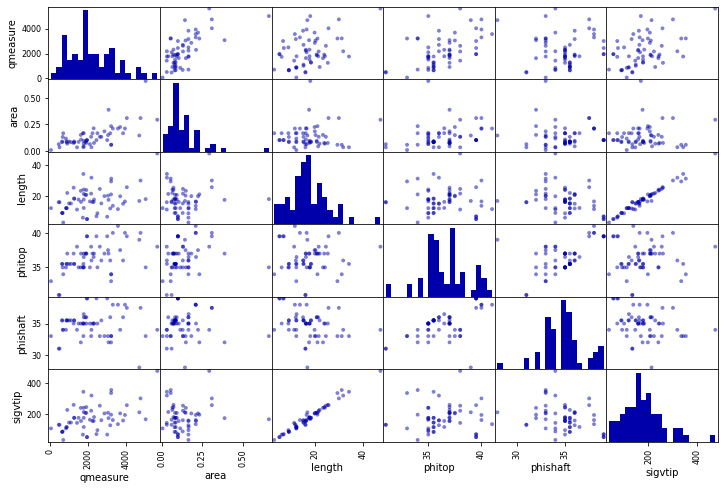

In [38]:
from pandas.plotting import scatter_matrix
#attributes = ["qmeasure", "phishaft", "area", "phitop"]
attributes = ["qmeasure", "area", "length", "phitop","phishaft","sigvtip"]
scatter_matrix(data[attributes], figsize=(12,8),  s=60, alpha=.5,
                hist_kwds={'bins': 20})

In [39]:
#*************************************************************************************
# Repeat !!

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
# extract numpy arrays
features = data_dummies.iloc[:,0:5]
X = features.values
f_all=  data_dummies.iloc[:,0:2]
X_all = f_all.values
y = data['qmeasure'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
print("X_all.shape: {}".format(X_all.shape))

Original features:
 ['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal', 'qmeasure_normal', 'qmeasure', 'qpredict'] 

Features after get_dummies:
 ['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal', 'qmeasure_normal', 'qmeasure', 'qpredict']
X.shape: (59, 5) y.shape: (59,)
X_all.shape: (59, 2)


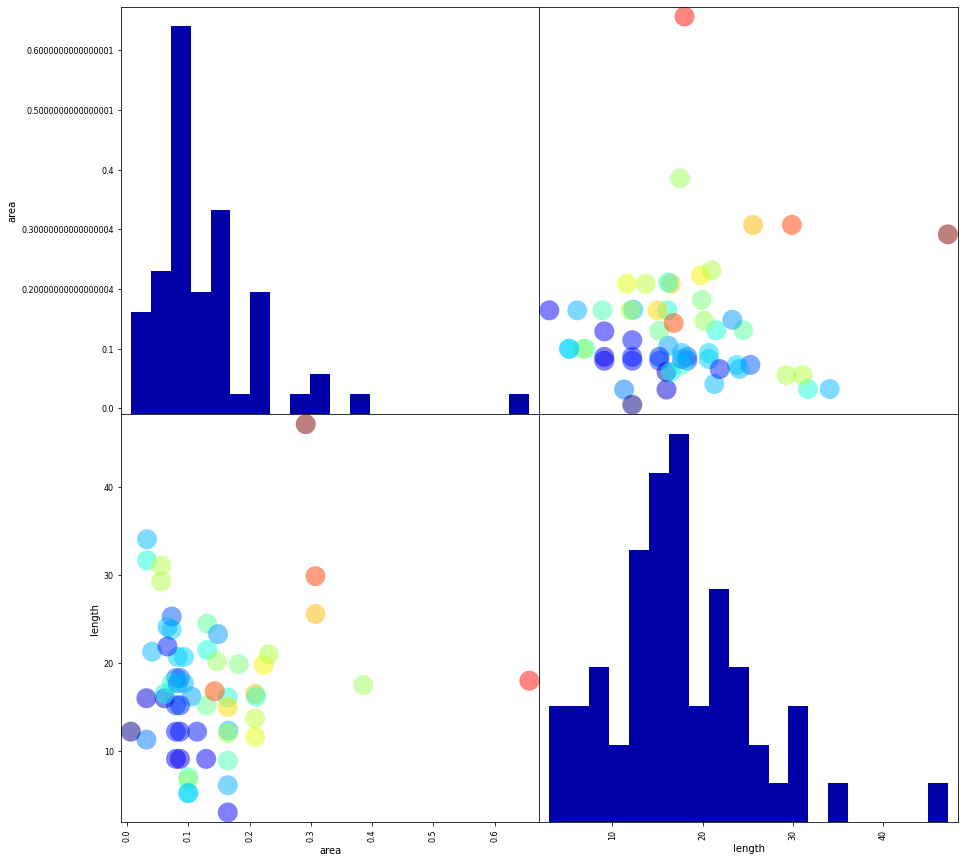

In [40]:
import mglearn
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
#X_dataframe = pd.DataFrame(X, columns=data.columns[0:5])
#X_dataframe = pd.DataFrame(X_all, columns=data.columns[0:7])
X_dataframe = pd.DataFrame(X_all, columns=data.columns[0:2])
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(X_dataframe, c=y, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20},
                           s=400,
                           alpha=.5,
                        cmap=plt.get_cmap("jet"),
#cmap=mglearn.cm3
                                           )
#                            ,label="qmeasure")
#pd.plotting.scatter_matrix(X_dataframe,   figsize=(15, 15), marker='o',
#                           hist_kwds={'bins': 20})
plt.show() # 책에는 없음

<AxesSubplot:xlabel='length', ylabel='area'>

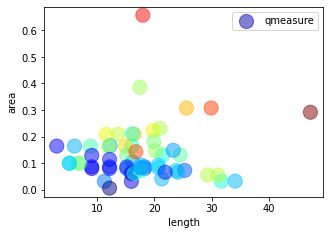

In [41]:
data.plot(kind="scatter", x="length", y="area",alpha=0.5,
#          s=data1["qmeasure"],
            s=200,
           label="qmeasure",figsize=(5,3.5),
#          c="qmeasure", cmap=plt.get_cmap("jet"), colorbar=True)
          c="qmeasure", cmap=plt.get_cmap("jet"), colorbar=False)
#plt.legend()
#plt.show()
#see the high-density areas by alpha

<AxesSubplot:xlabel='length', ylabel='sigvtip'>

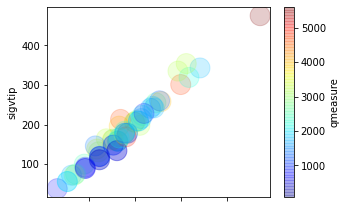

In [42]:
data.plot(kind="scatter", x="length", y="sigvtip",
           alpha=0.2,
        s=400,
#          s=data1["qmeasure"],
#            label="qmeasure",
           figsize=(5,3.5),
           c="qmeasure"
         , cmap=plt.get_cmap("jet"),
#           colorbar=False
           )

### k-neighbors regression

In [43]:
# for one-feature only

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
# extract numpy arrays
features = data_dummies.iloc[:,0:5]
X = features.values
f_all=  data_dummies.iloc[:,0:7]
X_all = f_all.values
#f_phishaft = data_dummies.iloc[:,3]
#X_phishaft = f_phishaft.values
f_phitop = data_dummies.iloc[:,2]
X_phitop = f_phitop.values
y = data['qmeasure'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
print("X_all.shape: {}".format(X_all.shape))
#print("X_phishaft.shape: {}".format(X_phishaft.shape))
X_phitop = X_phitop.reshape(-1,1)
y = y.reshape(-1,1)
print("X_phitop.shape: {}".format(X_phitop.shape))
print("y.shape: {}".format(y.shape))


Original features:
 ['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal', 'qmeasure_normal', 'qmeasure', 'qpredict'] 

Features after get_dummies:
 ['area', 'length', 'phitop', 'phishaft', 'sigvtip', 'sigv_normal', 'qmeasure_normal', 'qmeasure', 'qpredict']
X.shape: (59, 5) y.shape: (59,)
X_all.shape: (59, 7)
X_phitop.shape: (59, 1)
y.shape: (59, 1)


In [44]:
#*************************************************************************************

# p 53 int to ML with python
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_phishaft, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_phitop, y, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=42)


# needs stratified sampling for small data set: make strata and sample right number of instances from each stratum ....

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)

In [46]:
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
X_train = X_train.reshape(-1, 1)

In [47]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [48]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [[2422.333]
 [3982.667]
 [1795.333]
 [1795.333]
 [2360.667]
 [2033.333]
 [2360.667]
 [1016.333]
 [1016.333]
 [2422.333]
 [1795.333]
 [2814.333]
 [2299.333]
 [2299.333]
 [2360.667]]


In [49]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test.reshape(-1,1), y_test)))


테스트 세트 R^2: 0.12


#### KNeighborsRegressor 분석

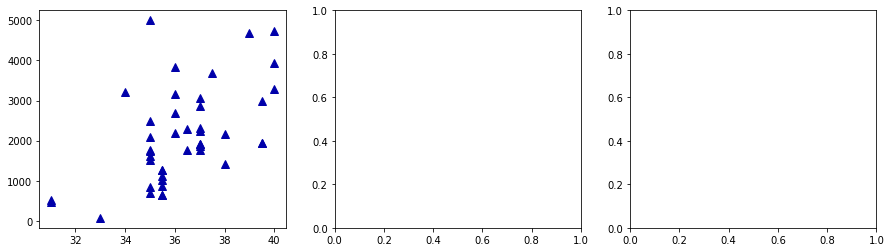

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)

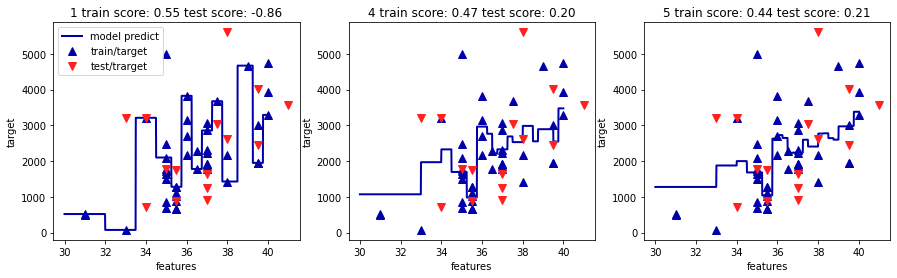

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(30, 40, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 4, 5], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("features")
    ax.set_ylabel("target")
axes[0].legend(["model predict", "train/target", "test/trarget"], loc="best")

### 선형 모델
#### 선형 회귀 모델

#### 선형회귀(최소제곱법)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [53]:
logreg = LinearRegression()
#lr = LinearRegression().fit(X_train[:,0:2], y_train)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

#print("Training set score: {:.2f}".format(lr.score(X_train[:,0:2], y_train)))
#print("Test score: {:.2f}".format(lr.score(X_test[:,0:2], y_test)))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [[6686.302 -291.34   108.299   25.363   33.783]]
lr.intercept_: [-4471.557]
Training set score: 0.81
Test score: 0.76


In [54]:
#    line = np.linspace(25, 38, 100).reshape(-1, 1)

   # lr = LinearRegression().fit(X_train, y_train)
  #  print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))
print("lr.coef_: {}".format(lr.coef_[0,0]))

print (lr.predict(X_test))
  #  plt.figure(figsize=(8, 8))
  #  plt.plot(line, lr.predict(line))

lr.coef_: 6686.302324591234
[[2833.543]
 [3612.452]
 [2139.674]
 [1581.914]
 [2323.34 ]
 [1802.12 ]
 [2199.383]
 [1273.516]
 [2080.243]
 [4752.256]
 [3092.788]
 [2617.56 ]
 [4071.133]
 [1957.721]
 [1743.289]]


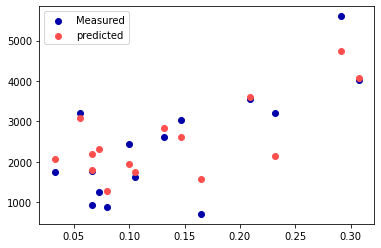

In [55]:
p = lr.predict(X_test)

#plt.scatter(lr.predict(X_test[:,0:2]), y_test, s=10)
plt.scatter(X_test[:,0],y_test,label='Measured')
plt.scatter(X_test[:,0], p,label='predicted')
plt.legend(loc='best')

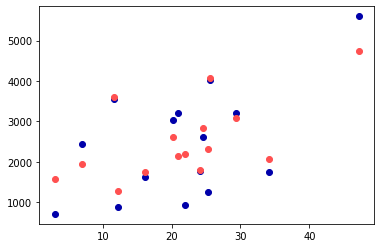

In [56]:
plt.scatter(X_test[:,1], y_test,label='Measured')
plt.scatter(X_test[:,1],p, label='predicted')

In [57]:
#df.describe().loc[['min','max','std'], 'Z3']
#data.describe().loc[['max','min'],'area', 'length', 'phitop', 'phishaft', 'sigvtip' ]
data.describe().loc[['max','min'],['area', 'length', 'phitop', 'phishaft', 'sigvtip'] ]


,area,length,phitop,phishaft,sigvtip
max,6.57e-01,47.2,41.0,39.0,475.0
min,6.10e-03,3.0,31.0,28.0,38.0


In [58]:
#x1 = np.array([[0.05,  0, 0, 0, 0], [0.3, 0, 0, 0, 0]])
X_test[0,:]
#X_test[14,:]

array([  0.131,  24.5  ,  38.   ,  33.   , 255.   ])

In [59]:
#xst = np.array([X_test[0,:], X_test[1,:]])
xst = np.array([[0.05,  3, 30, 30, 35], [0.7,47, 40, 40, 475]])

In [60]:
print (xst)
p = lr.predict(xst)

[[  0.05   3.    30.    30.    35.  ]
 [  0.7   47.    40.    40.   475.  ]]


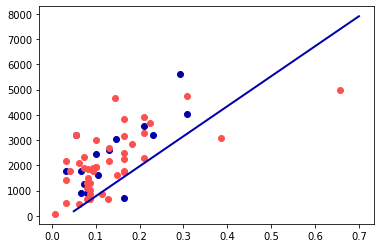

In [61]:
xst[:0,0]
p
plt.plot(xst[:,0], p)
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_train[:,0],y_train)

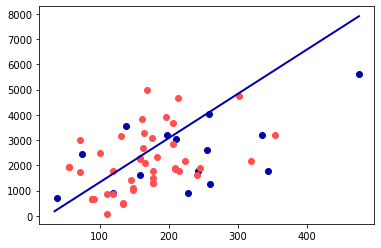

In [62]:
xst[:0,4]
plt.plot(xst[:,4], p)
plt.scatter(X_test[:,4],y_test)
plt.scatter(X_train[:,4],y_train)

In [63]:
# surface plot
######################## Prepare model data point for visualization ###############################

x0 = X_train[:, 0] #area
x1 = X_train[:, 1] # length
z = y_train

x0_pred = np.linspace(0.05, 0.7, 30)   # range of area values
x1_pred = np.linspace(3, 47, 30)  # range of length values
x2_pred = np.linspace(30, 40, 30)  # range of phitop values
x3_pred = np.linspace(30, 40, 30)  # range of phishaft values
x4_pred = np.linspace(30, 475, 30)  # range of sigvtip values
xx0_pred, xx1_pred = np.meshgrid(x0_pred, x1_pred)
model_viz = np.array([xx0_pred.flatten(), xx1_pred.flatten()]).T

In [64]:
xxx0_pred, xx2_pred =np.meshgrid(x0_pred, x2_pred)
xxx0_pred, xx3_pred =np.meshgrid(x0_pred, x3_pred)
xxx0_pred, xx4_pred =np.meshgrid(x0_pred, x4_pred)

In [65]:
model_viz4 = np.array([xx0_pred.flatten(), xx1_pred.flatten(),xx2_pred.flatten(),
                       xx3_pred.flatten(),xx4_pred.flatten()]).T


In [66]:
################################################ Train #############################################

predicted = lr.predict(model_viz4)

In [67]:
############################################## Evaluate ############################################

r2 = lr.score(X_train, y_train)
print(r2)

0.8124859485499777


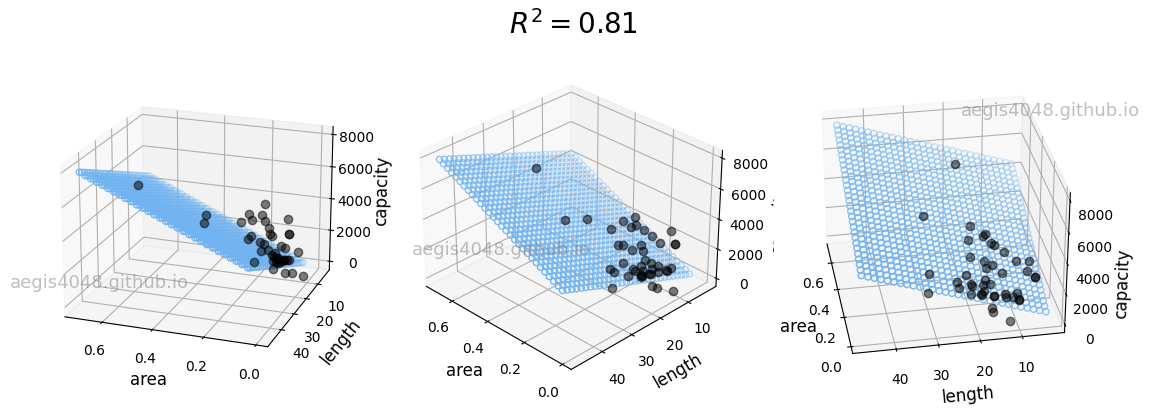

In [68]:
############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
z_series = pd.Series(z.flatten())


for ax in axes:
    ax.plot(x0, x1, z_series, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx0_pred.flatten(), xx1_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('area', fontsize=12)
    ax.set_ylabel('length', fontsize=12)
    ax.set_zlabel('capacity', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=20, azim=110)
ax2.view_init(elev=30, azim=135)
ax3.view_init(elev=30, azim=170)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

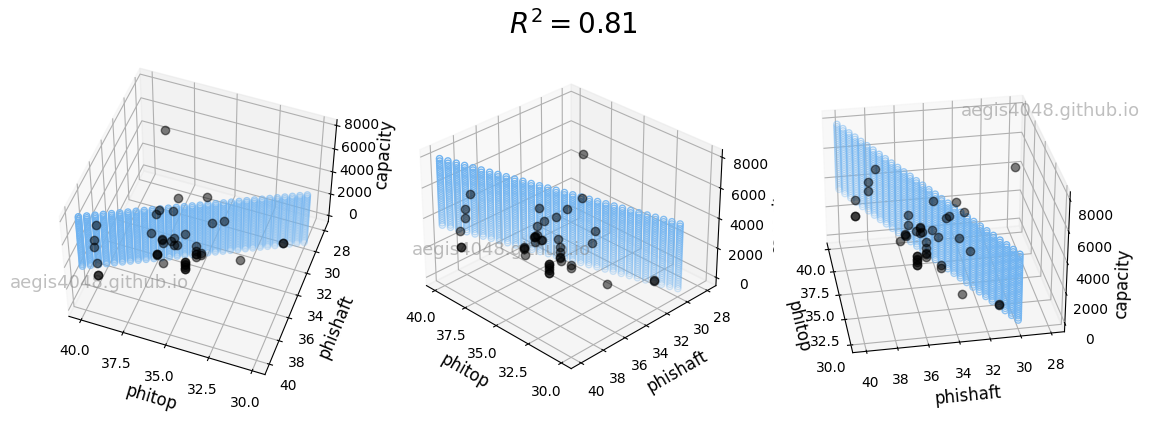

In [69]:
x0 = X_train[:, 2] #phitop
x1 = X_train[:, 3] # phishaft
############################################## Plot ################################################
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
z_series = pd.Series(z.flatten())


for ax in axes:
    ax.plot(x0, x1, z_series, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx2_pred.flatten(), xx3_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('phitop', fontsize=12)
    ax.set_ylabel('phishaft', fontsize=12)
    ax.set_zlabel('capacity', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=50, azim=110)
ax2.view_init(elev=30, azim=135)
ax3.view_init(elev=30, azim=170)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             59 non-null     float64
 1   length           59 non-null     float64
 2   phitop           59 non-null     float64
 3   phishaft         59 non-null     float64
 4   sigvtip          59 non-null     int64  
 5   sigv_normal      59 non-null     float64
 6   qmeasure_normal  59 non-null     float64
 7   qmeasure         59 non-null     int64  
 8   qpredict         59 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 4.3 KB


In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.66
테스트 세트 점수: 0.60


In [72]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.52
테스트 세트 점수: 0.50


In [73]:
#yyy = y_train.flatten()
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.80
테스트 세트 점수: 0.73


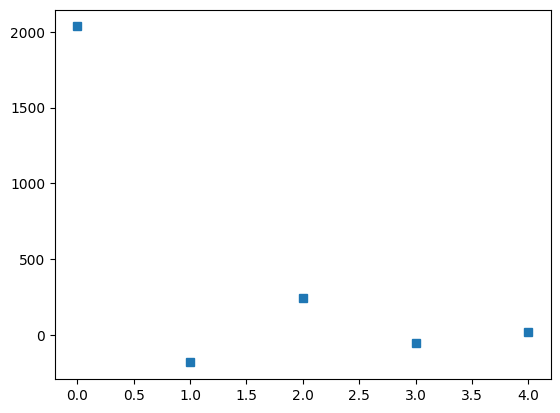

In [74]:
rr = ridge.coef_.flatten()
plt.plot(rr, 's', label="Ridge alpha=1")

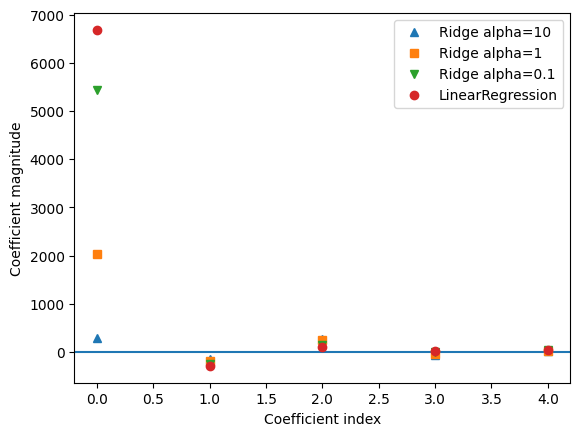

In [75]:
plt.plot(ridge10.coef_.flatten(), '^', label="Ridge alpha=10")
plt.plot(ridge.coef_.flatten(), 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_.flatten(), 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_.flatten(), 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
#plt.ylim(-25, 25)
plt.legend()

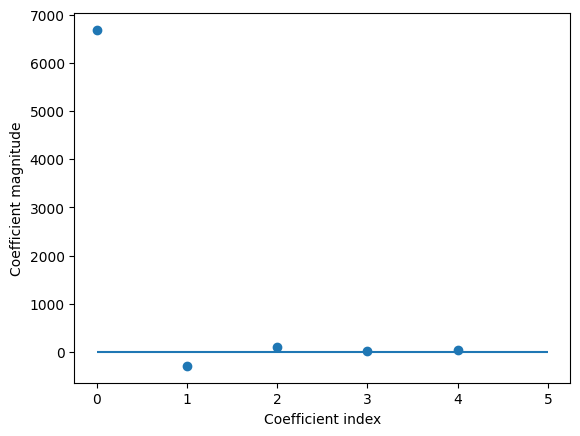

In [76]:
plt.plot(lr.coef_.flatten(), 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_.flatten()))

(-1.5, 1.1)

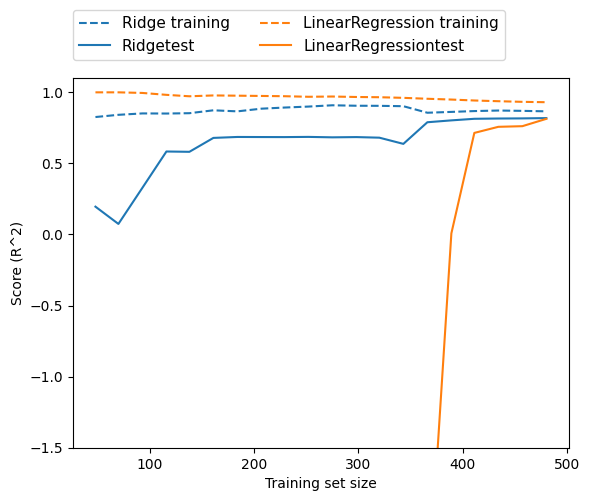

In [77]:
mglearn.plots.plot_ridge_n_samples()
plt.ylim(-1.5, 1.1)

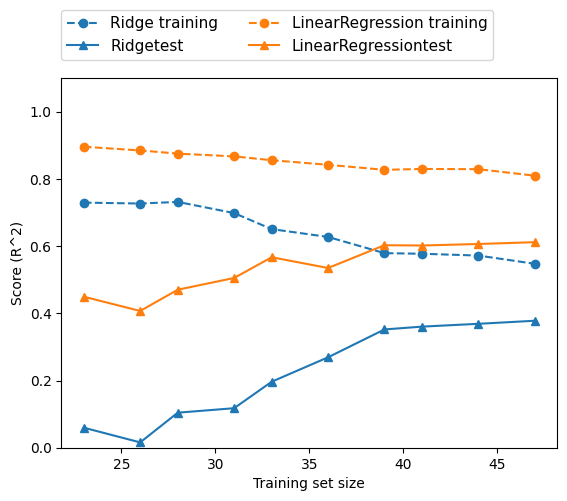

In [78]:
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve3(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
#        est, X, y, train_sizes=np.linspace(.1, 1, 5) )
        est, X, y, train_sizes=np.linspace(.5, 1, 10), cv=KFold(5, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--o',
                    label=estimator_name + " training")
    plt.plot(training_set_size, test_scores.mean(axis=1), '-^',
             label=estimator_name + "test", c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)
#    plt.ylim(-1.5, 1.1)


def plot_ridge_n_samples3(X, y):

    plot_learning_curve3(Ridge(alpha=5), X, y)
    plot_learning_curve3(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)


#mglearn.plots.plot_ridge_n_samples3(X,y)
plot_ridge_n_samples3(X,y)